# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [2]:
import pandas as pd


row = 649


data = pd.read_csv('data.csv')


#переводится в стринг, чтобы далее разделить эту строку
data['plans_universitypast_failures'] = data['plans_universitypast_failures'].astype(str)

#двум новым столбцам присваивается разделенная по некоторому шаблону строка которая слиплась
data[['plans_university', 'past_failures']] = data['plans_universitypast_failures'].str.extract(r'([-]?\d)(\d)')

#все переводится в инт
data['plans_university'] = data['plans_university'].astype(int)
data['past_failures'] = data['past_failures'].astype(int)
#удаление слипшегося столбца
del data['plans_universitypast_failures']


print(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3          40          2       4         5    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nu

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [3]:
bool_data = data.isnull() # возвращает датафрейм такого же размера только True если значение пустое, иначе – False
for column in data.columns:
    for i in range(row):
        if (bool_data.loc[i, column]):
            data.loc[i, column] = round(data[column].mean(), 0)
            
            
print(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3          40          2       4         5    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nu

#### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [4]:
# Нормализация данных с использованием min-max scaling
normal_data = (data - data.min()) / (data.max() - data.min())
print(normal_data)

          age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  \
0    0.000506  1.00  1.00    0.000000   0.333333    1.00      0.75   0.75   
1    0.001012  1.00  1.00    0.000000   0.000000    1.00      0.50   0.75   
2    0.000506  0.25  0.25    0.020408   0.000000    0.75      1.00   1.00   
3    0.001518  0.25  0.50    0.020408   0.000000    0.50      0.75   0.75   
4    0.001012  0.50  0.25    0.020408   0.333333    0.75      0.25   1.00   
..        ...   ...   ...         ...        ...     ...       ...    ...   
644  0.001518  0.50  0.50    0.061224   0.333333    0.75      0.25   1.00   
645  0.000000  1.00  1.00    0.020408   0.333333    0.75      0.50   0.00   
646  0.003036  0.25  0.25    0.020408   0.333333    1.00      0.50   0.50   
647  0.000506  0.50  0.50    0.000000   0.000000    0.75      0.50   0.75   
648  0.000506  0.50  0.75    0.795918   0.333333    0.75      1.00   0.75   

     Dalc  Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nursery 

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


scores = pd.read_csv('scores.csv', header=None)
scores.columns = ['score']

#создание двумерного массив Numpy
val1 = normal_data.values
val2 = scores.values

model = LinearRegression()
result = cross_validate(model, val1, val2, cv = 4)


print(result['test_score'])

[0.21881645 0.25841768 0.14161857 0.23287806]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [6]:
attendance = pd.read_csv('attendance.csv', delimiter=';')
support = pd.read_table('school_support.txt', header=None)
atd = []


for i in range(row):
    cnt = 0
    for col in attendance.columns:
        if attendance.loc[i, col] == '+':
            cnt += 1
    atd.append(cnt)

data['attendance'] = atd


support.columns = ['support']
sup = [0] * row
for i in range(len(support)):
    sup[support.loc[i, 'support']] = 1

data['support'] = sup

### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

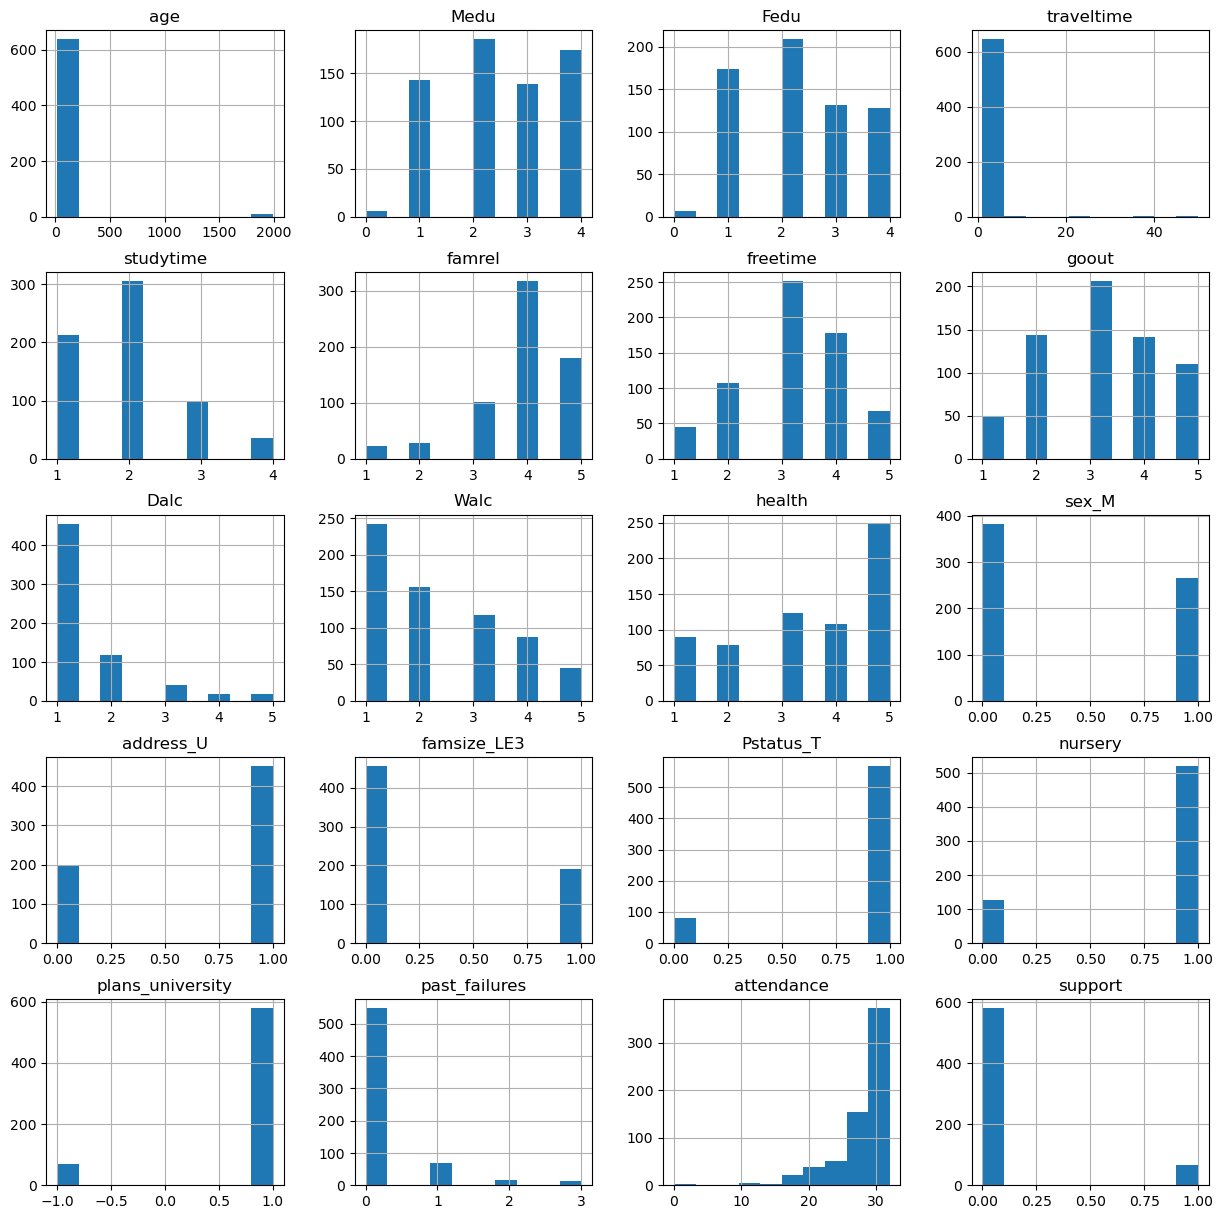

In [7]:
# Выведена гистограмма до удаления выбросов
data.hist(figsize=(15, 15))
# На гистограмме видно, что где-то ученики живут до 2000 лет, что неверно, значит в некоторых значениях укаазана
# дата рождения. Потом в столбце traveltime вместо условной шкалы в некоторых значениях написаны минуты.


for i in range(row):
    if data.loc[i, 'age'] > 30:
        data.loc[i, 'age'] = 2006 - data.loc[i, 'age']


f = lambda a: 1 if a < 15 else 2 if a < 30 else 3 if a < 60 else 4
for i in range(row):
    if data.loc[i, 'traveltime'] > 4:
        data.loc[i, 'traveltime'] = f(data.loc[i, 'traveltime'])

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

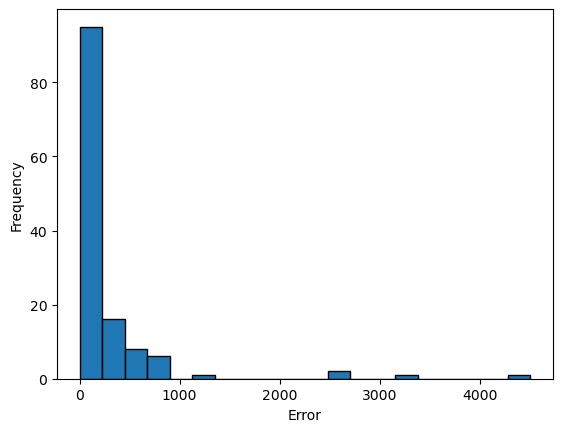

In [26]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data, scores, test_size=0.2, random_state=42)

regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
errors = (prediction - y_test) ** 2

# так как errors это нумпай массив, чтобы вывести гистограмму можно использовать matplotlib
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [87]:
result = cross_validate(model, data.values, scores.values, cv = 4)
result['test_score']

array([0.25009863, 0.27720492, 0.10908971, 0.23348629])

Несмотря на небольшое количество данных, качество обучения поменялось на несколько сотых